In [1]:
# Step 1: Install and import required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as  tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Step 2: Set constants
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10

In [4]:
# Step 3: Load and preprocess data
data_path = r'C:\Users\DELL\Downloads\archive (2)\dataset2-master\dataset2-master\images\TRAIN'
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

In [5]:
train_gen = datagen.flow_from_directory(
    data_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 7968 images belonging to 4 classes.


In [6]:
val_gen = datagen.flow_from_directory(
    data_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False 
)

Found 1989 images belonging to 4 classes.


In [7]:
# Step 4: Build the Transfer Learning model using MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # freeze base model

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')  # 4 classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()



9406464/9406464 [==============================] - 2s 0us/step

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                        

In [8]:
# Step 5: Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

Epoch 1/10


249/249 [==============================] - 445s 2s/step - loss: 1.1574 - accuracy: 0.4984 - val_loss: 0.8794 - val_accuracy: 0.6631
Epoch 2/10
249/249 [==============================] - 246s 988ms/step - loss: 0.8938 - accuracy: 0.6342 - val_loss: 0.7310 - val_accuracy: 0.7360
Epoch 3/10
249/249 [==============================] - 1070s 4s/step - loss: 0.7905 - accuracy: 0.6780 - val_loss: 0.6812 - val_accuracy: 0.7381
Epoch 4/10
249/249 [==============================] - 201s 808ms/step - loss: 0.7230 - accuracy: 0.7054 - val_loss: 0.5870 - val_accuracy: 0.7728
Epoch 5/10
249/249 [==============================] - 202s 810ms/step - loss: 0.6807 - accuracy: 0.7201 - val_loss: 0.5607 - val_accuracy: 0.7717
Epoch 6/10
249/249 [==============================] - 206s 830ms/step - loss: 0.6387 - accuracy: 0.7356 - val_loss: 0.5409 - val_accuracy: 0.7788
Epoch 7/10
249/249 [==============================] - 216s 869ms/step - loss: 0.6596 - accuracy: 0.7309 - val_loss: 0.5026 - va

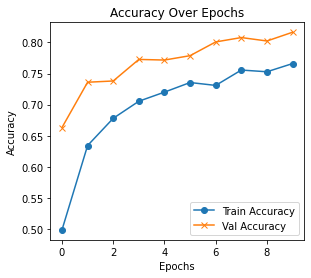

In [9]:
# Step 6: Visualize accuracy and loss
plt.figure(figsize=(10, 4))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='x')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


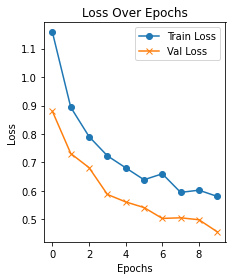

In [10]:
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

63/63 [==============================] - 43s 657ms/step
Classification Report:

              precision    recall  f1-score   support

  EOSINOPHIL       0.77      0.68      0.72       499
  LYMPHOCYTE       0.87      0.92      0.90       496
    MONOCYTE       0.86      0.92      0.89       495
  NEUTROPHIL       0.75      0.74      0.74       499

    accuracy                           0.82      1989
   macro avg       0.81      0.82      0.81      1989
weighted avg       0.81      0.82      0.81      1989

Confusion Matrix:

[[341  31  37  90]
 [ 17 458   7  14]
 [ 14   7 455  19]
 [ 70  29  32 368]]


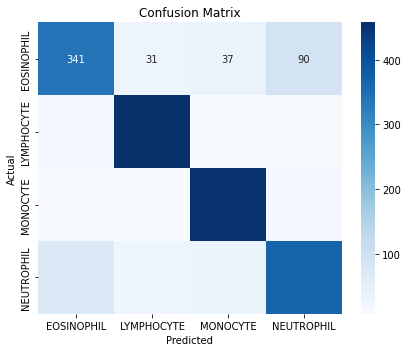

In [11]:
# Step 7: Classification Report and Confusion Matrix
val_gen.reset()
pred = model.predict(val_gen)
y_pred = np.argmax(pred, axis=1)
y_true = val_gen.classes
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(val_gen.class_indices.keys())))
print("Confusion Matrix:\n")
cm=confusion_matrix(y_true, y_pred)
print(cm)
labels = list(val_gen.class_indices.keys())
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix.png")  # Saves the figure as an image
plt.show()

In [12]:
# Step 8: Save the model
model.save("hematovision_model.h5")
print("Model saved as 'hematovision_model.h5'")

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as 'hematovision_model.h5'
